In [20]:
import numpy as np
import lightcone_FRB_decreasingz_xlos as lc
import os
import DM
import h5py
import matplotlib.pyplot as pl
import matplotlib as mpl
cmap2 = mpl.colors.ListedColormap(['k', 'yellow'])
cmap3 = mpl.colors.ListedColormap(['k', 'white'])
pl.rcParams["font.family"] = "Times New Roman"
pl.rcParams['ytick.labelsize']=24
pl.rcParams['xtick.labelsize']=24
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [112]:
#constants
pc = 3.08*10**16 #in terms of m
cm2m = 0.01 #cm to m

In [44]:
HII_DIM = 200
DIM = 800
z_start = 6.6
z_end = 6.0
nboxes = 4
N = 250
lightcone_sharpcutoff = 20

In [41]:
#directory to get the ionization boxes (for lightcone and ionization fied and density field)
io_boxes ='/Users/michael/Research/LAE_Clustering/Simulation_Boxes/MturnHaloes5e8_zeta25_MturnxHII5e8_beta1_fullEoR_Seed200_xLos_noHalos/'
oi_boxes = '/Users/michael/Research/LAE_Clustering/Simulation_Boxes/MturnHaloes5e8_zeta25_MturnxHII5e8_beta-1_fullEoR_Seed200_xLos/'

ionization_boxes = (io_boxes, oi_boxes)
density_boxes = '/Users/michael/Research/LAE_Clustering/Simulation_Boxes/MturnHaloes5e8_zeta25_MturnxHII5e8_beta1_fullEoR_Seed200_xLos/'


In [71]:
betas = (1, -1)
z_starts = np.linspace(8.6, 6.6, 11)
#z_starts = np.linspace(6.6, 6.0, 4)
#z_end = 6.0
nboxes = 14

density_z_beta = np.zeros((len(z_starts), len(betas)))


In [95]:
#make lightcone for each redshift, beta and slice

ionization_lightcones_beta_z_Dictionary = np.zeros((len(z_starts) , len(betas)) , dtype = object)
density_lightcones_beta_z_Dictionary = np.zeros((len(z_starts) , len(betas)) , dtype = object)
lightcone_redshifts_beta_z_Dictionary = np.zeros((len(z_starts) , len(betas)) , dtype = object)


for z in range(len(z_starts)):
    print('Doing z ' + str(z_starts[z]))

    
    for b in range(len(betas)):
        print('doing beta ' + str(betas[b]) )
        
        #make the lightcone for each quantity
        lightcone_Dictionary = {}
        densitylightcone_Dictionary = {}
        
        #if we wanted to change this to be the entire box, then change pixelsperslab to HII_DIM
        #and change the density method to slab = False
        for i in range(1):
            box_slice = HII_DIM - i -1
            lightcone_Dictionary[int(box_slice)] , lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_start = z_starts[z], z_end = z_end, N = N, nboxes = nboxes - int(z), box_slice = int(box_slice), directory =  ionization_boxes[b], return_redshifts = True )
            densitylightcone_Dictionary[int(box_slice)] = lc.lightcone(DIM = HII_DIM, z_start = z_starts[z], z_end = z_end, N = N, nboxes = nboxes - int(z), box_slice = int(box_slice), directory = density_boxes , marker = 'updated_smoothed_deltax')
            
    
        ionization_lightcones_beta_z_Dictionary[z][b] = lightcone_Dictionary
        lightcone_redshifts_beta_z_Dictionary[z][b] = lightcone_redshifts
        density_lightcones_beta_z_Dictionary[z][b] = densitylightcone_Dictionary
        
    print('Done this redshift')
            


Doing z 8.6
doing beta 1
doing beta -1
Done this redshift
Doing z 8.4
doing beta 1
doing beta -1
Done this redshift
Doing z 8.2
doing beta 1
doing beta -1
Done this redshift
Doing z 8.0
doing beta 1
doing beta -1
Done this redshift
Doing z 7.8
doing beta 1
doing beta -1
Done this redshift
Doing z 7.6
doing beta 1
doing beta -1
Done this redshift
Doing z 7.3999999999999995
doing beta 1
doing beta -1
Done this redshift
Doing z 7.199999999999999
doing beta 1
doing beta -1
Done this redshift
Doing z 7.0
doing beta 1
doing beta -1
Done this redshift
Doing z 6.8
doing beta 1
doing beta -1
Done this redshift
Doing z 6.6
doing beta 1
doing beta -1
Done this redshift


In [103]:
#compute the DM for that slice along the line of sight

slice_of_box = 199
DM_field = np.zeros((len(z_starts), len(betas), HII_DIM, HII_DIM))

x, y = 10, 10

for z in range(len(z_starts)):
    print('doing ' + str(z))
    for b in range(len(betas)):
        #for x in range(HII_DIM):
         #   for y in range(HII_DIM):
        DM_field[z][b][x][y] = DM.compute_DM(x,y, ionization_lightcones_beta_z_Dictionary[z][b][slice_of_box], density_lightcones_beta_z_Dictionary[z][b][slice_of_box], lightcone_redshifts_beta_z_Dictionary[z][b])



doing 0
doing 1
doing 2
doing 3
doing 4
doing 5
doing 6
doing 7
doing 8
doing 9
doing 10


In [102]:
#compute the DM along this line of sight
import DM
DM_field = np.zeros((HII_DIM, HII_DIM))
for x in range(HII_DIM):
    for y in range(HII_DIM):
        DM_field[x][y] = DM.compute_DM(x,y, xH_lightcone_Dictionary_insideout[199], densitylightcone_Dictionary_insideout[199], lightcone_redshifts_beta_z_Dictionary)


pl.figure(figsize = (10,10))
pl.imshow(DM_field)
pl.show()
pl.close()

AttributeError: 'numpy.ndarray' object has no attribute 'sqrt'

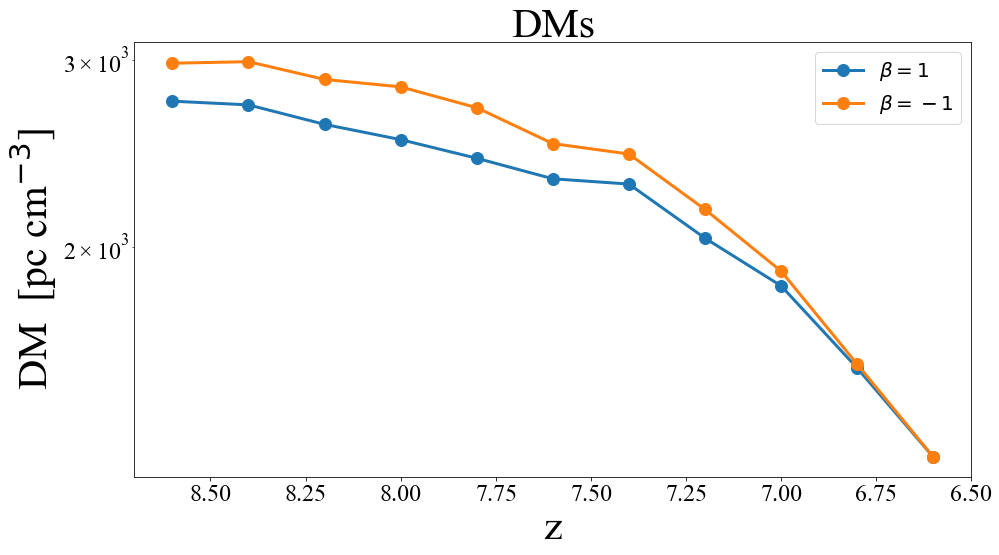

In [113]:
#plot

pl.figure(figsize = (15,8))
for b in range(len(betas)):
    pl.semilogy(np.round(z_starts,1), (0.01**3)*DM_field[:,b,10,10]/(pc),  marker = 'o',markersize = 12, linewidth=3., label = r'$\beta = {}$' .format(betas[b]))

pl.title(r'DMs', fontsize = 42)
pl.legend(prop={'size': 20})
#pl.gca().invert_yaxis()
pl.gca().invert_xaxis()
pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()